# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [258]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')
% matplotlib inline
## Load the data into a DataFrame
df = pd.read_csv("../Assets/Project3/Iowa_Liquor_sales_sample_10pct.csv")
## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")


In [259]:
df.head(5)

Date  Store Number         City Zip Code  County Number      County  \
0 2015-11-04          3717       SUMNER    50674            9.0      Bremer   
1 2016-03-02          2614    DAVENPORT    52807           82.0       Scott   
2 2016-02-11          2106  CEDAR FALLS    50613            7.0  Black Hawk   
3 2016-02-03          2501         AMES    50010           85.0       Story   
4 2015-08-18          3654      BELMOND    50421           99.0      Wright   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   
3  1071100.0         AMERICAN COCKTAILS            395        59154   
4  1031080.0             VODKA 80 PROOF            297        35918   

            Item Description  Bottle Volume (ml) State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750             $4.50   
1                    Tin Cup                 750            $13.75   
2                   Jim Beam                1000            $12.59   
3    1800 Ultimate Margarita                1750             $9.50   
4         Five O'clock Vodka                1750             $7.20   

  State Bottle Retail  Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
0               $6.75            12         $81.00                   9.0   
1              $20.63             2         $41.26                   1.5   
2              $18.89            24        $453.36                  24.0   
3              $14.25             6         $85.50                  10.5   
4              $10.80            12        $129.60                  21.0   

   Volume Sold (Gallons)  
0                   2.38  
1                   0.40  
2                   6.34  
3                   2.77  
4                   5.55

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [260]:
print 'The data set contains: %r rows and %r columns' % (df.shape[0],df.shape[1])
df.columns

The data set contains: 270955 rows and 18 columns


Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [261]:
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

The output shows us that we're working with a set of 270k records and 18 columns. Several of the column variables are encoded as numeric data types (int64 and float64) but a few of them are encoded as "object". Of those enconded as "object", State Bottle Cost and Retail as well as Sale (Dollars) should be transformed into "float64" type.

In [262]:
df[u'State Bottle Cost'] = df[u'State Bottle Cost'].apply(lambda x: x.lstrip('$'))
df[u'State Bottle Retail'] = df[u'State Bottle Retail'].apply(lambda x: x.lstrip('$'))
df[u'Sale (Dollars)'] = df[u'Sale (Dollars)'].apply(lambda x: x.lstrip('$'))
df[u'State Bottle Cost'] = df[u'State Bottle Cost'].apply(lambda x: float(x))
df[u'State Bottle Retail'] = df[u'State Bottle Retail'].apply(lambda x: float(x))
df[u'Sale (Dollars)'] = df[u'Sale (Dollars)'].apply(lambda x: float(x))

In [263]:
# Are there any null or empty values in df?
print df.isnull().any()
print df.count()

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number             True
County                    True
Category                  True
Category Name             True
Vendor Number            False
Item Number              False
Item Description         False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
dtype: bool
Date                     270955
Store Number             270955
City                     270955
Zip Code                 270955
County Number            269878
County                   269878
Category                 270887
Category Name            270323
Vendor Number            270955
Item Number              270955
Item Description         270955
Bottle Volume (ml)       270955
State Bottle Cost        270955
State Bottle R

In [264]:
df=df.dropna()
df.count()

Date                     269258
Store Number             269258
City                     269258
Zip Code                 269258
County Number            269258
County                   269258
Category                 269258
Category Name            269258
Vendor Number            269258
Item Number              269258
Item Description         269258
Bottle Volume (ml)       269258
State Bottle Cost        269258
State Bottle Retail      269258
Bottles Sold             269258
Sale (Dollars)           269258
Volume Sold (Liters)     269258
Volume Sold (Gallons)    269258
dtype: int64

In [265]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

City Zip Code  County   Category Name Item Description
count       269258   269258  269258          269258           269258
unique         382      412      99              71             2158
top     DES MOINES    50010    Polk  VODKA 80 PROOF     Black Velvet
freq         23618     7077   48944           35256             7208

In [266]:
df.describe()

Store Number  County Number      Category  Vendor Number  \
count  269258.000000  269258.000000  2.692580e+05   269258.00000   
mean     3587.695311      57.229642  1.043866e+06      256.36045   
std       946.505088      27.338810  5.021834e+04      140.98313   
min      2106.000000       1.000000  1.011100e+06       10.00000   
25%      2604.000000      31.000000  1.012200e+06      115.00000   
50%      3721.000000      62.000000  1.031200e+06      260.00000   
75%      4376.000000      77.000000  1.062310e+06      380.00000   
max      9023.000000      99.000000  1.701100e+06      978.00000   

         Item Number  Bottle Volume (ml)  State Bottle Cost  \
count  269258.000000       269258.000000      269258.000000   
mean    45944.813164          925.217375           9.763293   
std     52557.185155          492.837459           7.039787   
min       168.000000           50.000000           0.890000   
25%     26827.000000          750.000000           5.500000   
50%     38176.000000          750.000000           8.000000   
75%     64573.000000         1000.000000          11.920000   
max    995507.000000         6000.000000         425.000000   

       State Bottle Retail   Bottles Sold  Sale (Dollars)  \
count        269258.000000  269258.000000   269258.000000   
mean             14.660848       9.874028      128.828546   
std              10.559164      24.072335      383.477046   
min               1.340000       1.000000        1.340000   
25%               8.250000       2.000000       30.420000   
50%              12.110000       6.000000       70.560000   
75%              17.880000      12.000000      135.000000   
max             637.500000    2508.000000    36392.400000   

       Volume Sold (Liters)  Volume Sold (Gallons)  
count         269258.000000          269258.000000  
mean               8.991069               2.375397  
std               28.963204               7.651262  
min                0.100000               0.030000  
25%                1.500000               0.400000  
50%                5.250000               1.390000  
75%               10.500000               2.770000  
max             2508.000000             662.540000

Store Number  County Number  Category  Vendor Number  \
Store Number               1.000000       0.007724 -0.012263      -0.005079   
County Number              0.007724       1.000000 -0.006303       0.001717   
Category                  -0.012263      -0.006303  1.000000       0.091512   
Vendor Number             -0.005079       0.001717  0.091512       1.000000   
Item Number               -0.026459       0.006898  0.116619       0.136183   
Bottle Volume (ml)        -0.062526      -0.027864 -0.009055       0.025909   
State Bottle Cost         -0.071294       0.012032 -0.013571       0.003616   
State Bottle Retail       -0.071430       0.011958 -0.013758       0.003223   
Bottles Sold               0.014662       0.018950 -0.000080      -0.002303   
Sale (Dollars)            -0.017750       0.019775  0.006542      -0.012361   
Volume Sold (Liters)      -0.017375       0.010185 -0.004192      -0.007254   
Volume Sold (Gallons)     -0.017364       0.010194 -0.004183      -0.007250   

                       Item Number  Bottle Volume (ml)  State Bottle Cost  \
Store Number             -0.026459           -0.062526          -0.071294   
County Number             0.006898           -0.027864           0.012032   
Category                  0.116619           -0.009055          -0.013571   
Vendor Number             0.136183            0.025909           0.003616   
Item Number               1.000000           -0.057681           0.096084   
Bottle Volume (ml)       -0.057681            1.000000           0.312930   
State Bottle Cost         0.096084            0.312930           1.000000   
State Bottle Retail       0.095815            0.313911           0.999960   
Bottles Sold             -0.005021           -0.012183          -0.062832   
Sale (Dollars)            0.002372            0.082553           0.135770   
Volume Sold (Liters)     -0.010010            0.156141           0.009301   
Volume Sold (Gallons)    -0.010000            0.155973           0.009270   

                       State Bottle Retail  Bottles Sold  Sale (Dollars)  \
Store Number                     -0.071430      0.014662       -0.017750   
County Number                     0.011958      0.018950        0.019775   
Category                         -0.013758     -0.000080        0.006542   
Vendor Number                     0.003223     -0.002303       -0.012361   
Item Number                       0.095815     -0.005021        0.002372   
Bottle Volume (ml)                0.313911     -0.012183        0.082553   
State Bottle Cost                 0.999960     -0.062832        0.135770   
State Bottle Retail               1.000000     -0.062684        0.135954   
Bottles Sold                     -0.062684      1.000000        0.825912   
Sale (Dollars)                    0.135954      0.825912        1.000000   
Volume Sold (Liters)              0.009742      0.883972        0.846373   
Volume Sold (Gallons)             0.009711      0.884002        0.846385   

                       Volume Sold (Liters)  Volume Sold (Gallons)  
Store Number                      -0.017375              -0.017364  
County Number                      0.010185               0.010194  
Category                          -0.004192              -0.004183  
Vendor Number                     -0.007254              -0.007250  
Item Number                       -0.010010              -0.010000  
Bottle Volume (ml)                 0.156141               0.155973  
State Bottle Cost                  0.009301               0.009270  
State Bottle Retail                0.009742               0.009711  
Bottles Sold                       0.883972               0.884002  
Sale (Dollars)                     0.846373               0.846385  
Volume Sold (Liters)               1.000000               1.000000  
Volume Sold (Gallons)              1.000000               1.000000

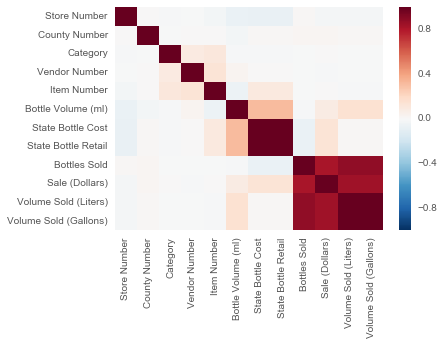

In [267]:
plt.figure(1)
sns.heatmap(df.corr());
df.corr()

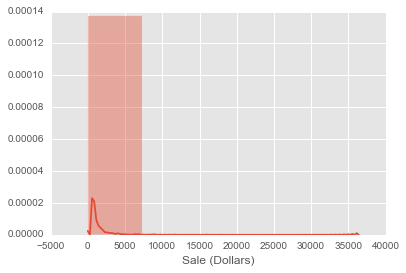

In [268]:
plt.figure(2)
sns.distplot(df['Sale (Dollars)'],bins=5);

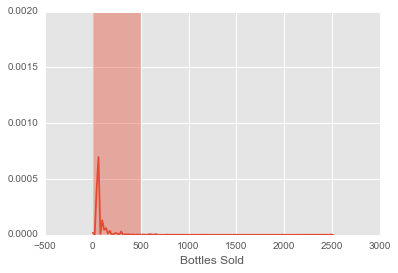

In [269]:
plt.figure(3)
sns.distplot(df['Bottles Sold'],bins=5);

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [271]:
df2015 = df[(df['Date'] > '2015-01-01') & (df['Date'] < '2015-12-31')]


In [ ]:
df2015 = df2015.drop['Sale (Dollars)']

In [ ]:
#df['Sale (Dollars)'].groupby('Store Number').sum()
#$dfstoresonly=df.groupby('Store Number').apply(lambda x: sum(x['Sale (Dollars)']))

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [272]:
df2015

Date  Store Number             City Zip Code  County Number  \
0      2015-11-04          3717           SUMNER    50674            9.0   
4      2015-08-18          3654          BELMOND    50421           99.0   
5      2015-04-20          2569     CEDAR RAPIDS    52402           57.0   
6      2015-08-05          2596          OTTUMWA    52501           90.0   
7      2015-06-25          3456       CLEAR LAKE    50428           17.0   
9      2015-11-10          4346       SHELLSBURG    52332            6.0   
10     2015-09-28          2648  WEST DES MOINES    50265           77.0   
11     2015-10-28          2600        OSKALOOSA    52577           62.0   
12     2015-01-22          3858        DAVENPORT    52806           82.0   
15     2015-06-10          3717           SUMNER    50674            9.0   
17     2015-12-29          2600        OSKALOOSA    52577           62.0   
18     2015-12-26          4604           NEWTON    50208           50.0   
19     2015-03-04          2614        DAVENPORT    52807           82.0   
20     2015-01-16          2590     CEDAR RAPIDS    52402           57.0   
21     2015-01-13          3942           TOLEDO    52342           86.0   
22     2015-03-24          3981     SIOUX CENTER    51250           84.0   
23     2015-11-12          4376       MASON CITY    50401           17.0   
25     2015-02-03          3390          MILFORD    51351           30.0   
26     2015-11-23          3565        IOWA CITY    52246           52.0   
27     2015-04-21          3963   COUNCIL BLUFFS    51501           78.0   
28     2015-12-01          4375           GRIMES    50111           77.0   
29     2015-01-14          2545        IOWA CITY    52245           52.0   
30     2015-04-01          4438             AMES    50010           85.0   
31     2015-01-12          2555           KEOKUK    52632           56.0   
32     2015-01-16          2549        INDIANOLA    50125           91.0   
33     2015-01-13          2644       FORT DODGE    50501           94.0   
34     2015-06-29          4195           TOLEDO    52342           86.0   
35     2015-04-02          2626       DES MOINES    50311           77.0   
36     2015-04-20          2532       DES MOINES    50317           77.0   
37     2015-06-03          4520           HUXLEY    50124           85.0   
...           ...           ...              ...      ...            ...   
270923 2015-09-10          2616          CLINTON    52732           23.0   
270924 2015-12-22          2500             AMES    50010           85.0   
270925 2015-01-05          2837         WATERLOO    50702            7.0   
270926 2015-12-26          2478          ALTOONA    50009           77.0   
270927 2015-08-31          2633       DES MOINES    50320           77.0   
270928 2015-10-07          3896        IOWA CITY    52240           52.0   
270930 2015-10-13          4634     CEDAR RAPIDS    52402           57.0   
270931 2015-05-26          2602     WEBSTER CITY    50595           40.0   
270932 2015-06-18          4604           NEWTON    50208           50.0   
270933 2015-02-26          4987             AMES    50010           85.0   
270934 2015-03-18          2623       SIOUX CITY    51104           97.0   
270935 2015-06-08          5126       DES MOINES    50310           77.0   
270936 2015-03-31          2552     CEDAR RAPIDS    52404           57.0   
270937 2015-01-27          2553          CRESTON    50801           88.0   
270938 2015-04-29          3890     CEDAR RAPIDS    52405           57.0   
270939 2015-05-04          4876         HIAWATHA    52233           57.0   
270940 2015-01-21          2523      CENTERVILLE    52544            4.0   
270941 2015-02-09          4856           LISBON    52253           57.0   
270942 2015-06-15          2512        IOWA CITY    52240           52.0   
270943 2015-10-21          4438             AMES    50010           85.0   
270945 2015-06-11          2627       DES MOINES    50310    

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.